In [1]:
##Content Based Anime Recomendation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
%matplotlib inline

In [3]:
##reading the dataset

In [4]:
df = pd.read_csv("anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [5]:
df.shape

(12294, 7)

In [6]:
##only creating the recommender system on the basis of genre and Type

In [7]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [8]:
# Handling missing values

In [9]:
##Handling missing ratings

In [10]:
df.loc[df['rating'].isnull(), 'rating'] = 0.0
df['rating'].isnull().any()

False

In [11]:
##Handling missing type

<AxesSubplot:>

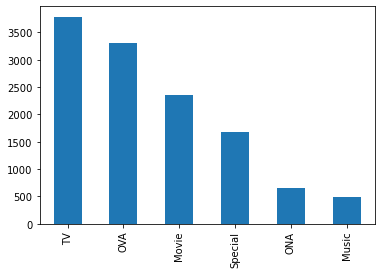

In [12]:
df['type'].value_counts().plot.bar()

In [13]:
df.loc[(df['episodes']=="Unknown")&(df['type'].isnull())].head()

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666


In [14]:
missing = df.loc[(df['episodes']=="Unknown")&(df['type'].isnull())].head()


In [15]:
missing.shape

(5, 7)

In [16]:
missing = df.loc[(df['episodes']=="Unknown")&(df['type'].isnull())].copy()

In [17]:
missing.shape

(25, 7)

In [18]:
missing.head(25)

,anime_id,name,genre,type,episodes,rating,members
10898,30484,Steins;Gate 0,"Sci-Fi, Thriller",NaN,Unknown,0.0,60999
10900,34437,Code Geass: Fukkatsu no Lelouch,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",NaN,Unknown,0.0,22748
10906,33352,Violet Evergarden,"Drama, Fantasy",NaN,Unknown,0.0,20564
10907,33248,K: Seven Stories,"Action, Drama, Super Power, Supernatural",NaN,Unknown,0.0,22133
10918,33845,Free! (Shinsaku),"School, Sports",NaN,Unknown,0.0,8666
10949,33475,Busou Shoujo Machiavellianism,"Action, School, Shounen",NaN,Unknown,0.0,1896
10963,31456,Code:Realize: Sousei no Himegimi,"Adventure, Fantasy, Romance, Shoujo",NaN,Unknown,0.0,4017
10983,34332,Flying Babies,NaN,NaN,Unknown,0.0,22
10988,34280,Gamers!,"Comedy, Romance, School",NaN,Unknown,0.0,1045
10990,34485,Ganko-chan,NaN,NaN,Unknown,0.0,11


In [19]:
df.loc[(df['name'] == "Steins;Gate 0"), 'type'] = 'TV'
df.loc[(df['name'] == "Steins;Gate 0"), 'episodes'] = '23'
df.loc[(df['name'] == "Violet Evergarden"), 'type'] = 'TV'
df.loc[(df['name'] == "Violet Evergarden"), 'episodes'] = '13'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'type'] = 'TV'
df.loc[(df['name'] == "Code Geass: Fukkatsu no Lelouch"), 'episodes'] = '25'
df.loc[(df['name'] == "K: Seven Stories"), 'type'] = 'Movie'
df.loc[(df['name'] == "K: Seven Stories"), 'episodes'] = '6'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Free! (Shinsaku)"), 'episodes'] = '12'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'type'] = 'TV'
df.loc[(df['name'] == "Busou Shoujo Machiavellianism"), 'episodes'] = '12'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'type'] = 'TV'
df.loc[(df['name'] == "Code:Realize: Sousei no Himegimi"), 'episodes'] = '12'
df.loc[(df['name'] == "Gamers!"), 'type'] = 'TV'
df.loc[(df['name'] == "Gamers!"), 'episodes'] = '12'
df.loc[(df['name'] == "Ganko-chan"), 'type'] = 'TV'
df.loc[(df['name'] == "Ganko-chan"), 'episodes'] = '10'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'type'] = 'OVA'
df.loc[(df['name'] == "Ginga Eiyuu Densetsu (2017)"), 'episodes'] = '110'
df.loc[(df['name'] == "Grancrest Senki"), 'type'] = 'TV'
df.loc[(df['name'] == "Grancrest Senki"), 'episodes'] = '24'
df.loc[(df['name'] == "IDOLiSH7"), 'type'] = 'TV'
df.loc[(df['name'] == "IDOLiSH7"), 'episodes'] = '17'
df.loc[(df['name'] == "Isekai Shokudou"), 'type'] = 'TV'
df.loc[(df['name'] == "Isekai Shokudou"), 'episodes'] = '12'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'type'] = 'TV'
df.loc[(df['name'] == "Oushitsu Kyoushi Haine"), 'episodes'] = '12'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'type'] = 'TV'
df.loc[(df['name'] == "Peace Maker Kurogane (Shinsaku)"), 'episodes'] = '24'
df.loc[(df['name'] == "Seikaisuru Kado"), 'type'] = 'TV'
df.loc[(df['name'] == "Seikaisuru Kado"), 'episodes'] = '12'
df.loc[(df['name'] == "UQ Holder!"), 'type'] = 'TV'
df.loc[(df['name'] == "UQ Holder!"), 'episodes'] = '12'
df.loc[(df['name'] == "Citrus"), 'type'] = 'TV'
df.loc[(df['name'] == "Citrus"), 'episodes'] = '12'
df.loc[(df['name'] == "Hitorijime My Hero"), 'type'] = 'TV'
df.loc[(df['name'] == "Hitorijime My Hero"), 'episodes'] = '12'
df.isnull().sum()

anime_id     0
name         0
genre       62
type         6
episodes     0
rating       0
members      0
dtype: int64

In [20]:
##there are still some animes with type 'unknown', so I will be dropping those anime

In [21]:
df.dropna(subset=['type'], inplace=True)
df.shape

(12288, 7)

In [22]:
##handling unknown genre

In [23]:
df.isnull().sum()

anime_id     0
name         0
genre       61
type         0
episodes     0
rating       0
members      0
dtype: int64

In [24]:
df[df['genre'].isnull()]

,anime_id,name,genre,type,episodes,rating,members
2844,33242,IS: Infinite Stratos 2 - Infinite Wedding,NaN,Special,1,7.15,6604
3541,33589,ViVid Strike!,NaN,TV,12,6.96,12345
6040,29765,Metropolis (2009),NaN,Movie,1,6.27,313
6646,32695,Match Shoujo,NaN,ONA,1,6.02,242
7018,33187,Katsudou Shashin,NaN,Movie,1,5.79,607
...,...,...,...,...,...,...,...
11070,32032,Seikaisuru Kado,NaN,TV,12,0.00,1797
11086,34310,Tamagotchi Movie: Tanpen Himitsu no Otodoke Da...,NaN,Movie,1,0.00,51
11097,34474,Tsukipro The Animation,NaN,TV,Unknown,0.00,843
11112,33035,Yuyushiki Special,NaN,Special,1,0.00,2294


In [25]:
##filling the genre NaN with unknown

In [26]:
df['genre'].fillna('Unknown', inplace=True)
df.isnull().any()

anime_id    False
name        False
genre       False
type        False
episodes    False
rating      False
members     False
dtype: bool

In [27]:
##starting to build the recomender sytem

In [28]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [29]:
##I think it will be a good idea tp calculate weighted rating

In [30]:
a = df.members.quantile(0.75)
c = df.rating.mean()

In [31]:
print(a, c)

9448.5 6.355887858072929


In [32]:
def weighted_rating(df, a, c):
    term = df['members'] / (a+df['members'])
    return df['rating'] * term + (1-term) * c

In [33]:
df['community_rating'] = df.apply(weighted_rating, axis=1, args=(a, c))
df.head()

,anime_id,name,genre,type,episodes,rating,members,community_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,9.234437
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,9.225834
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,9.028960
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,9.131071
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,8.995145


In [34]:
##dropping some colums
##dropping rating and members as we have calculated community_rating
##dropping episodes because the dataset is not up to date with current animes
##dropping anime_id an dusing just the pandas index

In [35]:
df.drop(['anime_id', 'rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,name,genre,type,community_rating
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145


In [36]:
##We want our algorithm to treat the 'type' and 'genre' of anime as equal. Therefore if we use label encoding, maybe the algorithm will treat a certain category more important than the other categories.

In [37]:
df = pd.concat([df,df['type'].str.get_dummies(), df['genre'].str.get_dummies])
df.head

TypeError: cannot concatenate object of type '<class 'method'>'; only Series and DataFrame objs are valid

In [38]:
df = pd.concat([df,df['type'].str.get_dummies(), df['genre'].str.get_dummies(sep=',')], axis=1)
df.head()

,name,genre,type,community_rating,Movie,Music,ONA,OVA,Special,TV,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [39]:
anime_feature = df.loc[:, "Movie":].copy()

In [40]:
anime_feature.head()

,Movie,Music,ONA,OVA,Special,TV,Adventure,Cars,Comedy,Dementia,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
##calculating the similarity matrix

In [42]:
cosine_sim = cosine_similarity(anime_feature.values, anime_feature.values)

In [43]:
cosine_sim

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]])

In [44]:
cosine_sim.shape

(12288, 12288)

In [45]:
##creating a indexing for each anime name, this will be used when user quering a recommendation

In [46]:
anime_index = pd.Series(df.index, index=df.name).drop_duplicates()

In [47]:
def get_recommendation(anime_name, similarity = cosine_sim):
    ind = anime_index[anime_name]
    
    #get the pairwise similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[ind]))
    
    #Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    #get the scores of the 10 most similar anime
    sim_scores = sim_scores[0:11]
    
    #get the anime indices
    anime_indices = [i[0] for i  in sim_scores]
    
    #returning the top 10 most similar anime
    result = df[['name', 'genre', 'community_rating']].iloc[anime_indices].drop(ind)
    return result

In [48]:
get_recommendation

<function __main__.get_recommendation(anime_name, similarity=array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.31622777],
       [0.        , 1.        , 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.375     , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.5       ],
       [0.31622777, 0.        , 0.        , ..., 0.5       , 0.5       ,
        1.        ]]))>

In [49]:
get_recommendation("Steins;Gate")

,name,genre,community_rating
10898,Steins;Gate 0,"Sci-Fi, Thriller",0.852459
3581,Fireball Charming,Sci-Fi,6.574226
7984,Hanoka,Sci-Fi,6.040040
8910,Hoshi no Ko Poron,Sci-Fi,6.360831
10079,RoboDz,Sci-Fi,6.338184
10858,Yuusei Kamen,Sci-Fi,6.356795
10975,Escha Chron,Sci-Fi,5.861462
59,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,"Sci-Fi, Thriller",8.504498
126,Steins;Gate: Oukoubakko no Poriomania,"Sci-Fi, Thriller",8.342360
196,Steins;Gate: Kyoukaimenjou no Missing Link - D...,"Sci-Fi, Thriller",7.946121


In [50]:
get_recommendation("Violet Evergarden")

,name,genre,community_rating
128,Kemono no Souja Erin,"Drama, Fantasy",8.021722
210,Nagi no Asukara,"Drama, Fantasy, Romance",8.240826
3942,Ginyuu Mokushiroku Meine Liebe Wieder,"Drama, Fantasy, Shoujo",6.523089
5644,Andersen Monogatari (TV),"Drama, Fantasy, Kids",6.357237
9479,Manga Kodomo Bunko,"Drama, Fantasy, Kids",6.353985
321,Tokyo Magnitude 8.0,Drama,8.057508
762,Hello! Lady Lynn,Drama,6.590162
968,Black Jack (TV),Drama,7.216899
4606,Kojika Monogatari,Drama,6.365572
6047,Tabi Machi Late Show,Drama,6.324543


In [51]:
get_recommendation("Naruto")

,name,genre,community_rating
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",7.912437
175,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",8.298872
206,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.271811
515,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.710105
588,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.830726
1209,Medaka Box Abnormal,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.472471
1930,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.318395
2615,Medaka Box,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.142463
3038,Tenjou Tenge,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.037725
178,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",8.295029


In [52]:
anime_index.shape

(12288,)

In [53]:
anime_index.head(5)

name
Kimi no Na wa.                      0
Fullmetal Alchemist: Brotherhood    1
Gintama°                            2
Steins;Gate                         3
Gintama&#039;                       4
dtype: int64

In [54]:
df

,name,genre,type,community_rating,Movie,Music,ONA,OVA,Special,TV,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,6.307703,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,Hentai,OVA,6.316446,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,Hentai,OVA,6.322454,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,6.330868,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
anime_index.iloc(500).name

ValueError: No axis named 500 for object type Series

In [56]:
new_df = df['name']

In [57]:
new_df.head(10)

0                                       Kimi no Na wa.
1                     Fullmetal Alchemist: Brotherhood
2                                             Gintama°
3                                          Steins;Gate
4                                        Gintama&#039;
5    Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6                               Hunter x Hunter (2011)
7                                 Ginga Eiyuu Densetsu
8    Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9                             Gintama&#039;: Enchousen
Name: name, dtype: object

In [58]:
new_df.iloc[50].name

AttributeError: 'str' object has no attribute 'name'

In [59]:
new_df

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12288, dtype: object

In [60]:
new_df.iloc[50]

'Yojouhan Shinwa Taikei'

In [61]:
import pickle

In [62]:
pickle.dump(new_df,open('anime.pkl','wb'))

In [63]:
pwd

'C:\\Users\\Anushka'

In [65]:
new_df.values

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [67]:
pickle.dump(cosine_sim,open('similarity.pkl','wb'))

In [68]:
new_df

0                                           Kimi no Na wa.
1                         Fullmetal Alchemist: Brotherhood
2                                                 Gintama°
3                                              Steins;Gate
4                                            Gintama&#039;
                               ...                        
12289         Toushindai My Lover: Minami tai Mecha-Minami
12290                                          Under World
12291                       Violence Gekiga David no Hoshi
12292    Violence Gekiga Shin David no Hoshi: Inma Dens...
12293                     Yasuji no Pornorama: Yacchimae!!
Name: name, Length: 12288, dtype: object

In [69]:
new_df.iloc[1]

'Fullmetal Alchemist: Brotherhood'

In [70]:
new_df.loc[1]

'Fullmetal Alchemist: Brotherhood'

In [71]:
animename = 'Naruto'

In [75]:
if new_df.value(animename)=='Naruto':
    print("true")

AttributeError: 'Series' object has no attribute 'value'

In [76]:
df['name'].values

array(['Kimi no Na wa.', 'Fullmetal Alchemist: Brotherhood', 'Gintama°',
       ..., 'Violence Gekiga David no Hoshi',
       'Violence Gekiga Shin David no Hoshi: Inma Densetsu',
       'Yasuji no Pornorama: Yacchimae!!'], dtype=object)

In [77]:
pickle.dump(df,open('anime_name.pkl','wb'))

In [78]:
df

,name,genre,type,community_rating,Movie,Music,ONA,OVA,Special,TV,...,Shounen,Slice of Life,Space,Sports,Super Power,Supernatural,Thriller,Unknown,Vampire,Yaoi
0,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,9.234437,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,9.225834,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,9.028960,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,Steins;Gate,"Sci-Fi, Thriller",TV,9.131071,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,8.995145,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12289,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,6.307703,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,Under World,Hentai,OVA,6.316446,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12291,Violence Gekiga David no Hoshi,Hentai,OVA,6.322454,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12292,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,6.330868,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
get_recommendation('Naruto')

,name,genre,community_rating
615,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",7.912437
175,Katekyo Hitman Reborn!,"Action, Comedy, Shounen, Super Power",8.298872
206,Dragon Ball Z,"Action, Adventure, Comedy, Fantasy, Martial Ar...",8.271811
515,Dragon Ball Kai (2014),"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.710105
588,Dragon Ball Kai,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.830726
1209,Medaka Box Abnormal,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.472471
1930,Dragon Ball Super,"Action, Adventure, Comedy, Fantasy, Martial Ar...",7.318395
2615,Medaka Box,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.142463
3038,Tenjou Tenge,"Action, Comedy, Ecchi, Martial Arts, School, S...",7.037725
178,Boku no Hero Academia,"Action, Comedy, School, Shounen, Super Power",8.295029


In [82]:
get_recommendation('Kimi no Na wa.').name

208        Kokoro ga Sakebitagatterunda.
1494                            Harmonie
1959                           Air Movie
60                    Hotarubi no Mori e
1199    &quot;Bungaku Shoujo&quot; Movie
2103                       Clannad Movie
5796                    Taifuu no Noruda
5805         Wind: A Breath of Heart OVA
6394        Wind: A Breath of Heart (TV)
894                     Momo e no Tegami
Name: name, dtype: object

In [87]:
df['name'].head(20)

0                                        Kimi no Na wa.
1                      Fullmetal Alchemist: Brotherhood
2                                              Gintama°
3                                           Steins;Gate
4                                         Gintama&#039;
5     Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...
6                                Hunter x Hunter (2011)
7                                  Ginga Eiyuu Densetsu
8     Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...
9                              Gintama&#039;: Enchousen
10                                 Clannad: After Story
11                                       Koe no Katachi
12                                              Gintama
13                   Code Geass: Hangyaku no Lelouch R2
14                              Haikyuu!! Second Season
15                        Sen to Chihiro no Kamikakushi
16                              Shigatsu wa Kimi no Uso
17                        Mushishi Zoku Shou 2nd

In [90]:
df['name'].iloc[1]

'Fullmetal Alchemist: Brotherhood'

In [91]:
get_recommendation('Fullmetal Alchemist: Brotherhood').name

200                                Fullmetal Alchemist
101                         Magi: The Kingdom of Magic
268                       Magi: The Labyrinth of Magic
290                        Magi: Sinbad no Bouken (TV)
795                     Densetsu no Yuusha no Densetsu
4264                                    Tide-Line Blue
6868                               Jikuu Tenshou Nazca
10953            Chain Chronicle: Haecceitas no Hikari
1558     Fullmetal Alchemist: The Sacred Star of Milos
255                                  Fairy Tail (2014)
Name: name, dtype: object

In [106]:
get_recommendation('Black Clover').name

2761                                      Senyuu. Specials
3144                            Overlord: Ple Ple Pleiades
10508                          Tenkuu Senki Shurato Recaps
9421                     Madou King Granzort: Nonstop Rabi
207      Fate/stay night: Unlimited Blade Works - Prologue
1785     Fate/stay night: Unlimited Blade Works 2nd Sea...
3698           Makai Senki Disgaea: Welcome to Netherworld
3833                                     Log Horizon Recap
4978           Densetsu no Yuusha no Densetsu: Iris Report
5955                                    Prism Ark Specials
Name: name, dtype: object